In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import wandb
api = wandb.Api()

sweep_ids = ['gjnv0mua', 'kno86i7c', '9x922cee', 'ire6sash', 's45fguzh', 'g31vwkha', 'g1aqz63h', '2twrb0mg', 'zcg50g60']

In [3]:
metric = 'f1_score'

In [4]:
names, configs, f1_scores = [], [], []
for i, sweep_id in enumerate(sweep_ids):
    sweep = api.sweep(f"ogait/thesis_gravity_spy/{sweep_id}")
    for run in sweep.runs:
        names.append(run.name)
        configs.append(f'tl_best{i+1}' if i < 6 else f'tl_fast{i-5}')
        f1_scores.append(run.summary[metric])

In [5]:
sweep_id = "m4nqsh6e"
sweep = api.sweep(f"ogait/thesis_gravity_spy/{sweep_id}")
for run in sweep.runs:
    names.append(run.name)
    configs.append("baseline")
f1_scores += list(pd.read_csv('logs/04_baseline_scratch_corrected_f1.csv')['f1_score'])[::-1]

In [6]:
sweep_id = "bk150cyb"
sweep = api.sweep(f"ogait/thesis_gravity_spy/{sweep_id}")
for run in sweep.runs:
    names.append(run.name)
    configs.append("baseline")
    f1_scores.append(run.summary[metric])

In [7]:
f1_df = pd.DataFrame(list(zip(configs[::-1], names[::-1], f1_scores[::-1])), columns=['config', 'name', metric])
f1_df.tail()

,config,name,f1_score
50,tl_best1,eager-sweep-1,0.975900
51,tl_best1,dulcet-sweep-2,0.972614
52,tl_best1,playful-sweep-3,0.976118
53,tl_best1,solar-sweep-4,0.976968
54,tl_best1,pious-sweep-5,0.973063


In [8]:
f1_df.loc[f1_df['config']=='baseline'].sort_values(by=metric)

,config,name,f1_score
6,baseline,pleasant-sweep-2,0.967499
8,baseline,celestial-sweep-4,0.968429
9,baseline,happy-sweep-5,0.970251
1,baseline,earthy-sweep-2,0.971245
0,baseline,rare-sweep-1,0.972910
4,baseline,fluent-sweep-5,0.974682
5,baseline,celestial-sweep-1,0.978132
3,baseline,soft-sweep-4,0.979065
2,baseline,happy-sweep-3,0.980292
7,baseline,soft-sweep-3,0.980712


In [9]:
f1_df.loc[f1_df['config']=='baseline'].median()

/tmp/ipykernel_25208/943709967.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  f1_df.loc[f1_df['config']=='baseline'].median()


f1_score    0.973796
dtype: float64

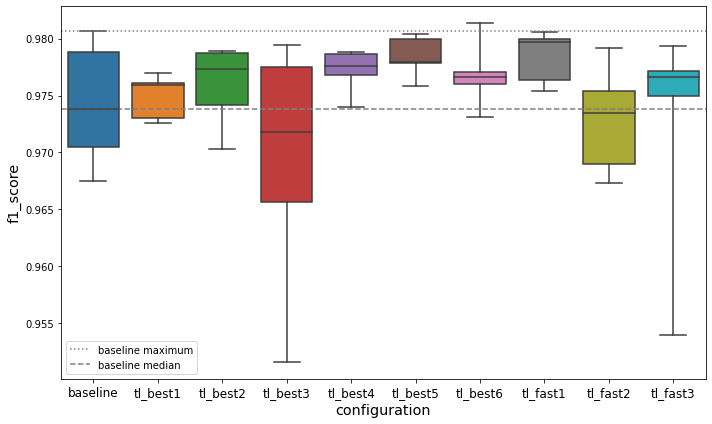

In [11]:
fig = plt.figure(figsize=(10, 6))
sns.boxplot(x='config', y=metric, data=f1_df, whis=100, order=sorted(f1_df['config'].unique()))
#plt.ylim([0.945, 0.985])
plt.hlines(0.980712, -0.5, 9.5, linestyles='dotted', color='grey', label='baseline maximum')
plt.hlines(0.973796, -0.5, 9.5, linestyles='dashed', color='grey', label='baseline median')
ax = plt.gca()
l = ax.get_ylabel()
ax.set_ylabel(l, size='x-large')
ax.set_xlabel("configuration", size='x-large')
plt.xticks(fontsize='large')
plt.legend()
#ax.set_xticks([])
fig.tight_layout()

fig.savefig('../figs/glitches/12_transfer_best_scores.png', dpi=300)

In [12]:
f1_df.sort_values(by='f1_score', ascending=False).head(10)

,config,name,f1_score
26,tl_best6,effortless-sweep-2,0.981348
7,baseline,soft-sweep-3,0.980712
23,tl_fast1,ethereal-sweep-4,0.980595
33,tl_best5,logical-sweep-4,0.980402
2,baseline,happy-sweep-3,0.980292
31,tl_best5,dashing-sweep-2,0.979969
24,tl_fast1,swift-sweep-5,0.979934
22,tl_fast1,trim-sweep-3,0.979741
44,tl_best3,sparkling-sweep-5,0.979463
13,tl_fast3,sweet-sweep-4,0.979354
